# Problem Statement
Use a clustering method, to cluster the attached data into 3 groups.
Dataset:
- each data sample is a 1D signal containing 2400 points
 
Expected Results:
- What is the method used for the clustering? How is it decided which method to use?
- Visualization of the clusters with the labels of the data point
- The developed codes
Hint: You may need to focus on a part of the signal for the best clustering

------

In [199]:
# Importing the required libraries
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import glob
%matplotlib inline

In [76]:
# Reading data from npy files and loading them in a pandas dataframe called signals
signals = pd.DataFrame()
for file_name in glob.glob('data/*.npy'):
    signal = np.load(file_name)
    signal_df = pd.Series(signal)
    signals = signals.append(signal_df, ignore_index=True)
    

In [77]:
#number of signal instances
len(signals)

40

In [78]:
signals.head()

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,-1.020655e-08,-2.147462e-08,-1.890199e-07,-5.325592e-08,-3.064178e-08,1.406537e-07,-2.412475e-07,-9.168271e-08,1.143110e-07,-1.369934e-07,...,2.811217e-07,-2.553447e-07,-7.344644e-08,-5.063273e-08,2.786232e-07,1.420729e-07,-7.870585e-08,8.286630e-08,-6.485559e-09,-9.626877e-08
1,-8.559531e-09,-1.292749e-07,1.925737e-07,1.235749e-07,2.535424e-08,-6.479239e-08,-4.356228e-07,-1.413963e-07,-3.695342e-08,-1.046278e-08,...,-1.749254e-07,7.925441e-07,5.283744e-08,4.895735e-08,9.733692e-08,3.375401e-07,2.316942e-07,4.145673e-08,1.556237e-07,-4.044595e-07
2,-6.520007e-08,-7.959749e-08,3.253761e-07,-1.236538e-07,-2.512885e-07,8.454931e-08,5.617506e-08,-2.911598e-07,-8.073579e-08,1.091110e-07,...,-4.420583e-08,-4.625470e-07,-1.782242e-07,3.830455e-07,-3.669072e-08,8.909005e-08,-6.565725e-08,7.509395e-08,-5.243655e-08,-1.259894e-07
3,6.294390e-08,-6.783597e-08,-7.140310e-08,-1.342798e-07,5.472558e-08,1.430622e-07,1.511341e-07,-1.747872e-07,-1.296043e-07,-3.924204e-09,...,-9.562957e-08,-2.206713e-07,-5.854607e-07,8.064854e-08,1.011567e-07,-2.138958e-08,-1.674352e-07,2.917937e-07,2.851239e-07,-5.211931e-09
4,1.495973e-07,5.712547e-08,1.963405e-07,1.656615e-07,4.049582e-08,-8.913096e-08,1.857768e-07,-2.381631e-07,-2.848334e-07,-1.971723e-09,...,-9.237839e-08,6.078436e-07,4.491621e-08,1.222890e-08,-9.455031e-08,2.078868e-07,-1.263185e-07,-3.266097e-07,1.614203e-07,1.130663e-07


## Visual Exploration of The Signals

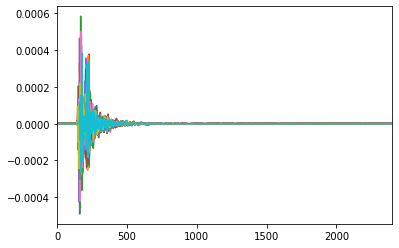

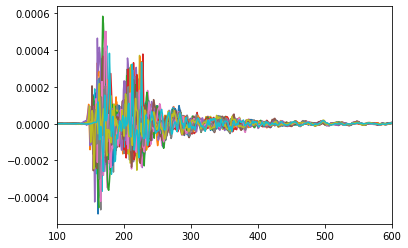

In [168]:
signals.T.plot(legend=None)
signals.T.plot(legend=None, xlim=[100,600])
plt.show()

## Trimming Signals 

As can be seen in the graphs above, all 40 signals converge to 0 after a certain point. This point seems to be roughly around the 500th point of the signals. Therefore, there are not much information in the signals from ~500th point forward. Similarly, all 40 signals seem to be 0 prior to the ~125th point. For this reason, I have focused on points within [125,500] to cluster the signals

In [169]:
# Trimming signals (considering points in [125,500])
trm_signals = signals.T[125:500].T

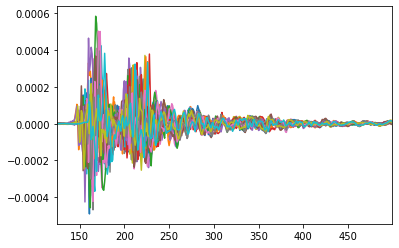

In [170]:
trm_signals.T.plot(legend=None)

------

# Clustering

The general approach I have chosen for clustering the given signals is "Agglomerative Hierarchical Clustering" method.

Motivations to choose this method:
* Hierarchical clustering normally performs well with the presense of good distance/similarity measures. In case of working with time series data such as signals, we can work with both Euclidean and Dynamic time warping (DTW) distance measures depending on the nature of the signals. Euclidean distance might work well here as all signals are equal in size (2500 points) and occured within the same time range.
* We don't have too many instances (40 only), enabling us to use pairwise distance measurement (computing all possible distances among all instances) within a reasonable time. 
* Popular clustering algorithms like KMeans won't be expected to perform well in a high-demensional space and also while working with a few instances. We have a few hundreds of dimensions with only 40 samples here, making KMeans potentially not the best candidate.

In agglomarative hierarchical clustering, each single instance is first assigned to a unique cluster. Iteratively, the closest pair of clusters will be merged until only one single cluster left. We can visualize this process using a Dendrogram diagram which is created based on a matrix called Linkage Matrix.

## Approach 1: Ward Linkage / Euclidean Distance
Euclidean is the most popular distance measure, which is basically the length of the straight line between two instances. It can be subjected to two main limitations when it comes to time series/signals: 1) It fails to capture similarity if the signals are not equal in length 2) It fails to capture similarity if the signals occur in different time range. Fortunately enough, we don't have these two issues in this problem, as all 40 signals are equal in length and occured within the same time range.

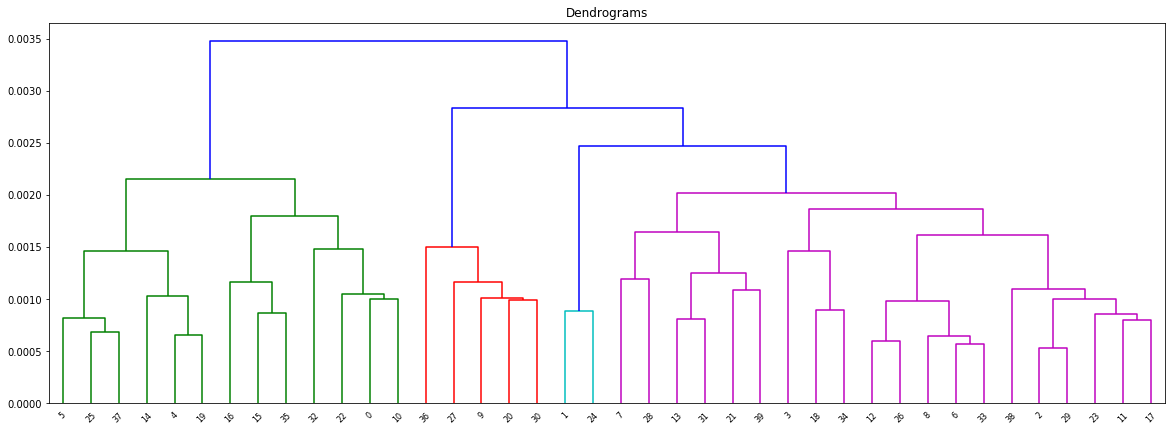

In [174]:
#Dendograms of the trimmed signal using Ward linkage.
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = hc.dendrogram(hc.linkage(trm_signals, method='ward'))

## Interpretation of The Dendrogram Diagram

As can be seen in the Dendrogram diagram, we can consider 3 main clusters. These 3 main clusters lies underneath the 3 blue branches on the top, i.e. one cluster is composed of the green instances, the other is composed of the red instances, and the last one is composed of purple instances + instances 1 and 24. One might place instances 1 and 24 together in a 4th cluster. 

Now let's fit a agglomerative clustering model on our signals using euclidean/ward distance metrics:

In [185]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(trm_signals)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0,
       1, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0])

## Visualizing Signals by Cluster
In the following part, I have grouped signals by their clusters and visualized each cluster separately.

In [214]:
signal_clusters = {}
for i in range(cluster.n_clusters):
    signal_clusters[i] = pd.DataFrame()
    
signal_index = 0
for c in cluster.labels_:
    signal_clusters[c] = signal_clusters[c].append(trm_signals.iloc[[signal_index]])
    signal_index += 1
    

In [215]:
clt = 1
for i in range(cluster.n_clusters):
    print("Cluster {} size: {}".format(clt,len(signal_clusters[i])))
    clt+=1

Cluster 1 size: 22
Cluster 2 size: 13
Cluster 3 size: 5


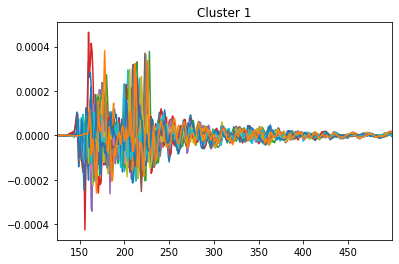

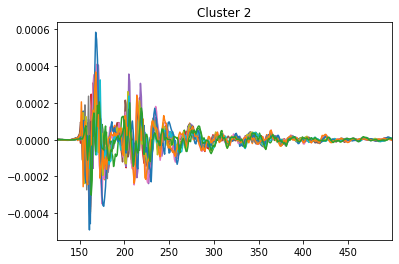

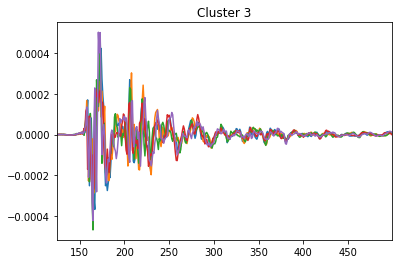

In [198]:
for i_c in range(cluster.n_clusters):
    signal_clusters[i_c].T.plot(legend = None, title = "Cluster {}".format(i_c+1))
plt.show()

### Interpretation of The Clusters Diagrams
As can be seen in the diagrams above, signals in each cluster represent a similar behavior, which is different than the signals' behaviors in the other two clusters.

## Approach 2: Dynamic Time Wrapping (DTW) Distance Measure

Despite Euclidean distance measure, DTW captures similarities based on the signals' shapes, and is not sensetive to time shifts. This distance measure has more advanced features and strengths compared to Euclidean. [Here](https://nbviewer.jupyter.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb) is the reference that I used to learn about this distance measure, and also the way it can be implemented.

One potential drawback of this distance measure is that it is costly in time when applying to high demensional signals.

As there is no built-in DTW distance measure is defined in sklearn AgglomerativeClustering, I used the following implementation of DTWDistance between two numpy arrays presented in [this](https://nbviewer.jupyter.org/github/alexminnaar/time-series-classification-and-clustering/blob/master/Time%20Series%20Classification%20and%20Clustering.ipynb) resource, and passed it to sklearn AgglomerativeClustering as a custom affinity:

In [205]:
#DTW implementation
from math import sqrt
def DTWDistance(s1, s2):
    DTW={}
    
    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
            
    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [209]:
def dtw(X):
    return pairwise_distances(X, metric=DTWDistance)

cluster_dtw = AgglomerativeClustering(n_clusters=3, affinity=dtw, linkage='average')
cluster_dtw.fit_predict(trm_signals)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0])

In [216]:
signal_clusters_dtw = {}
for i in range(cluster_dtw.n_clusters):
    signal_clusters_dtw[i] = pd.DataFrame()
    
signal_index = 0
for c in cluster_dtw.labels_:
    signal_clusters_dtw[c] = signal_clusters_dtw[c].append(trm_signals.iloc[[signal_index]])
    signal_index += 1
    

In [217]:
clt = 1
for i in range(cluster_dtw.n_clusters):
    print("Cluster {} size: {}".format(clt,len(signal_clusters_dtw[i])))
    clt+=1

Cluster 1 size: 29
Cluster 2 size: 9
Cluster 3 size: 2


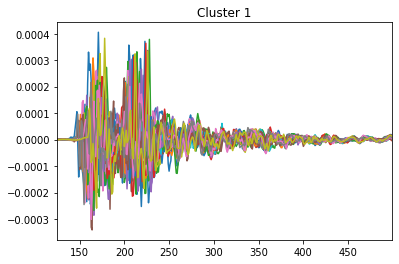

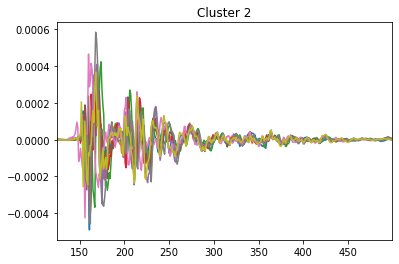

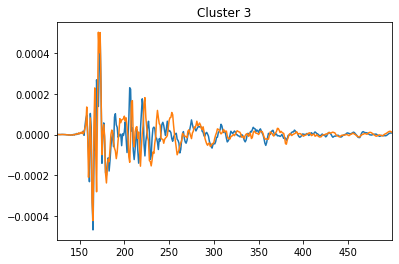

In [218]:
for i_c in range(cluster_dtw.n_clusters):
    signal_clusters_dtw[i_c].T.plot(legend = None, title = "Cluster {}".format(i_c+1))
plt.show()

### Wrap-up
Intuitively, it seems that Euclidean distance measure has led to cleaner clusters. If that's true (as pure intuition is not enough to judge), the main reasons could be (1) All signals are equal in length (2) There are no rotations in any of the signals (3)All signals occured within the same time range. These observations can make the simpler distance metric of Euclidean a better candidate. 